In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

### Read the data 

In [5]:
cookies = pd.read_csv(r'C:\Users\iLoveyou\IronHack\Python\Machine Learning\Random Forest\cookies.csv')

In [6]:
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3


### Exploratory Data Analysis and Descriptive Statistics

In [7]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5198 non-null   float64
 1   sugar index           5193 non-null   float64
 2   bake temp             5198 non-null   int64  
 3   chill time            5198 non-null   float64
 4   calories              5198 non-null   float64
 5   density               5198 non-null   float64
 6   pH                    5198 non-null   float64
 7   grams baking soda     5198 non-null   float64
 8   bake time             5188 non-null   float64
 9   quality               5198 non-null   int64  
 10  butter type           5198 non-null   object 
 11  weight                5198 non-null   float64
 12  diameter              5198 non-null   int64  
 13  mixins                5196 non-null   object 
 14  crunch factor         5198 non-null   float64
 15  aesthetic appeal     

# EDA in Tableau

## View in Tableau of Quality versus variables. 
### tells us: 
1. Drop Diameter, Density and Aesthetic sccore - dont vary across scores. 
2. PH values: very little variance. Consider dropping
3. Bake Times - some but not a lot of variance. 
4. Highlighted Varaibles show greatest variance across different quality categories. 

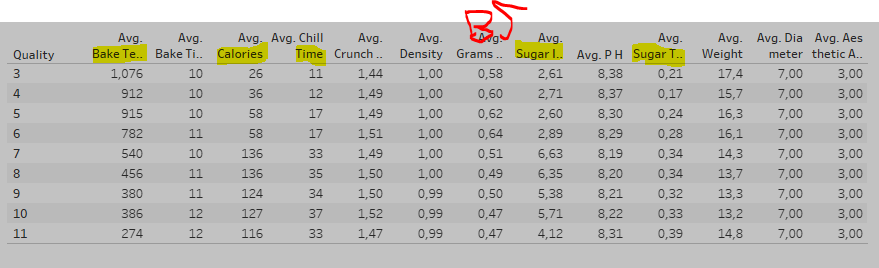

In [10]:
from IPython.display import Image
Image(filename='Overview of values.png') 

### Misleading view with Sugar and Calories on a scatter plot
Looks on this scatter that they correlate closely. but careful! - this is not necessarily the case. Actually so many of the values are near the bottom of this scatter plot - so only seeing the cookier with larger counts on each variable (still not quite sure why this is)


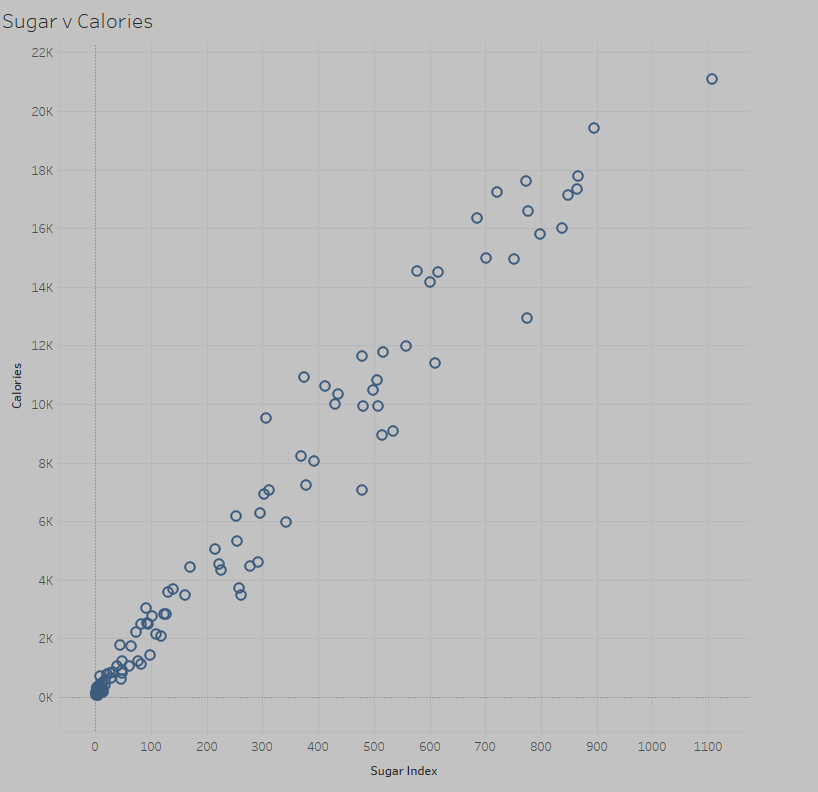

In [32]:
Image(filename='SugarCalories.png', width = 400)

### Oats look like the 'sweet spot' for tasty goodness (low sugar/calory and high quality)

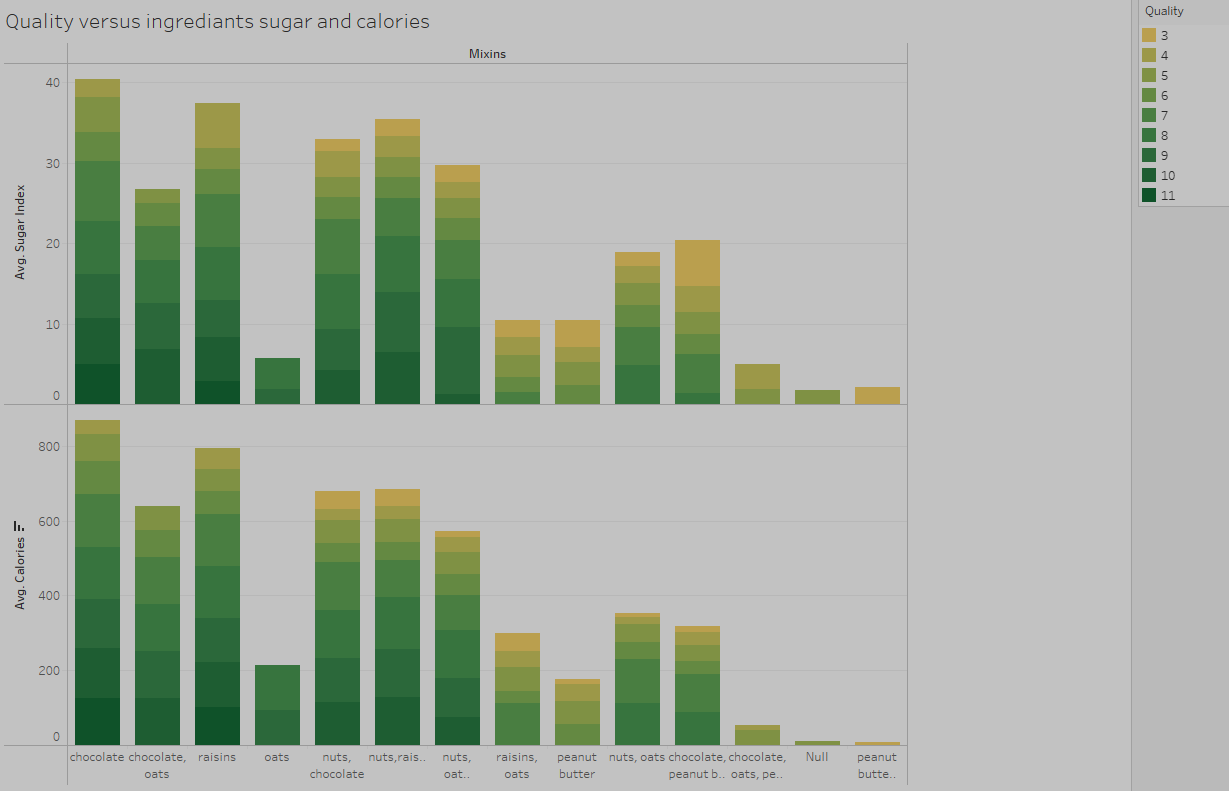

In [46]:
Image(filename='Oats.png', width = 400)

## Bake time 

In [11]:
cookies['bake time'].describe()

count    5188.000000
mean       10.494758
std         1.194584
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: bake time, dtype: float64

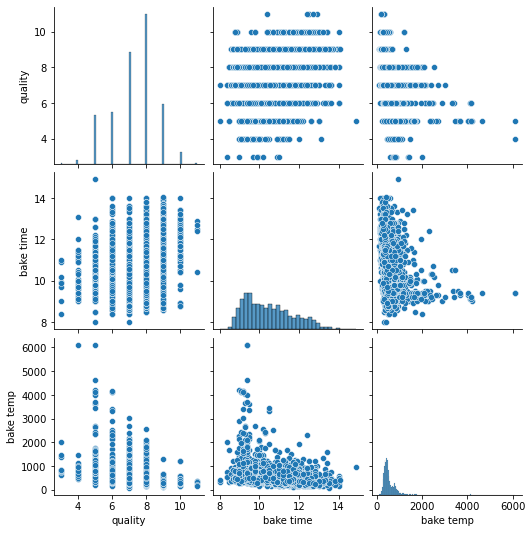

In [12]:
sns.pairplot(cookies[['quality', 'bake time', 'bake temp']])

<ipython-input-31-2baf936c2286>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(cookies.corr(), dtype=np.bool))


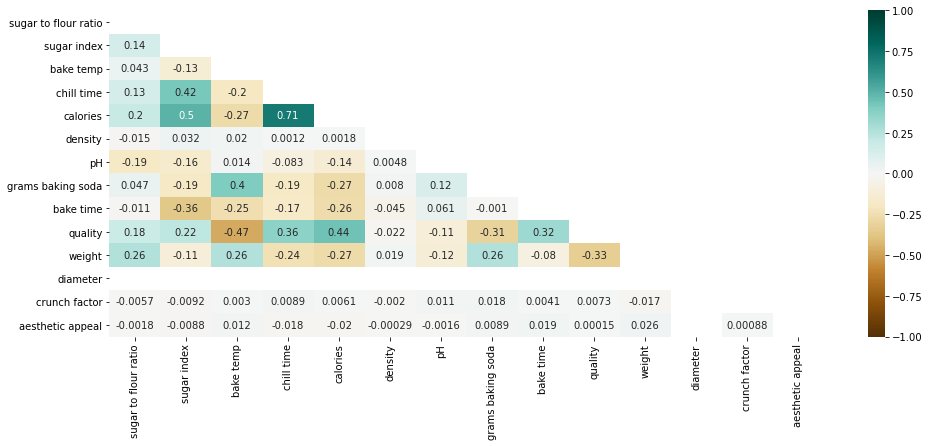

In [31]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(cookies.corr(), dtype=np.bool))
heatmap = sns.heatmap(cookies.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [33]:
num_cols = cookies.select_dtypes(include=["int64", "float64"]).columns

for column in num_cols:
    print(column, '-->', cookies['quality'].corr(cookies[column]))

sugar to flour ratio --> 0.1821346059774524
sugar index --> 0.22065352244335407
bake temp --> -0.4705037090124245
chill time --> 0.36465303504313296
calories --> 0.4398363987447589
density --> -0.02199530876237496
pH --> -0.11472101703648846
grams baking soda --> -0.3053403830897962
bake time --> 0.3153070710526111
quality --> 1.0
weight --> -0.3282994017266426
diameter --> nan
crunch factor --> 0.007262050440050124
aesthetic appeal --> 0.00015142266125481668


## butter

In [34]:
cookies['butter type'].value_counts()

melted    3920
cubed     1278
Name: butter type, dtype: int64

## aesthetic appeal

In [35]:
cookies['aesthetic appeal'].value_counts()


3    5195
4       3
Name: aesthetic appeal, dtype: int64

Thoughts on aesthetics : 
    not many values - drop column 

## weight

In [36]:
cookies['weight'].describe()

count    5198.000000
mean       14.381935
std         3.023740
min       -99.000000
25%        12.800000
50%        14.000000
75%        15.400000
max        31.800000
Name: weight, dtype: float64

In [37]:
cookies['weight'].unique()

array([ 15.2,  12.4,   9.4,  12.2,  19.8,  13.2,  14.2,  13.8,  12.6,
        12.8,  13. ,  14. ,  12. ,  14.6,  15.6,  13.4,  16.8,  14.8,
        13.6,  16. ,  11. ,  18.6,  10.6,  18.2,  15.8,  17.2,  14.3,
        10.4,  11.8,  11.6,  15.4,  21.6,  20.2,  14.4,  12.3,  23.8,
        11.2,  11.4,  15. ,  19.6,  17.4,  16.4,  19.2,  10.8,  18. ,
        26. ,  16.6,  16.2,  19. ,  10. ,  21.4,  20.4,  17. ,  31.2,
        17.8,  22.6,   9.8,  23. ,  18.8,  26.6,  20.8,  26.4,  10.2,
        22.2,  23.4,  18.4,  17.6,  28.4,  24.6,  20.6,  25. ,  24.2,
        22.8,  24. ,  23.2,  24.4,  26.8,  22.4,  19.4,  23.6,  27.4,
        28. ,  22. ,  21.8,  25.2,  25.8,  20. ,  21.2,  21. , -99. ,
        25.6,  31. ,   9. ,  24.8,  25.4,   9.6,   8.8,  30. ,  12.9,
         9.2,  31.8,   7.6,   7.8,   8.4,  28.6])

Thoughts on weight : 

    Remove -99 value

## diameter

In [38]:
cookies['diameter'].unique()

array([7], dtype=int64)

Thoughts on diameter : 

    All equal to 7 - column can be dropped 

## bake time

In [39]:
cookies['bake time'].describe()

count    5188.000000
mean       10.494758
std         1.194584
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: bake time, dtype: float64

In [40]:
cookies[cookies['bake time'].isnull()]['quality']

13       7
173      8
484     10
816      7
1562     8
1867     7
1933     7
2215     9
2910     6
3746    10
Name: quality, dtype: int64

Thoughts on Bake time 

    judging by the spread of nulls across quality bands, any missing values could be replaced by mean or rows dropped 

## crunch factor

<AxesSubplot:ylabel='Frequency'>

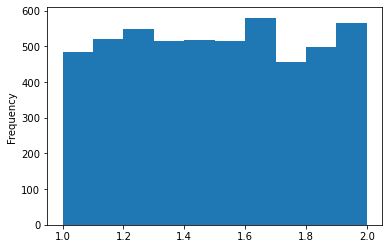

In [41]:
cookies['crunch factor'].plot.hist()

Thoughts on Crunch Factor. - Ideally we would know about how this figure is come by. Hard to assess what it is or whether it represents anything without additional information. - Saying this. We should still leave it in place as it may be an important variable. 

## mixins

In [42]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5198 non-null   float64
 1   sugar index           5193 non-null   float64
 2   bake temp             5198 non-null   int64  
 3   chill time            5198 non-null   float64
 4   calories              5198 non-null   float64
 5   density               5198 non-null   float64
 6   pH                    5198 non-null   float64
 7   grams baking soda     5198 non-null   float64
 8   bake time             5188 non-null   float64
 9   quality               5198 non-null   int64  
 10  butter type           5198 non-null   object 
 11  weight                5198 non-null   float64
 12  diameter              5198 non-null   int64  
 13  mixins                5196 non-null   object 
 14  crunch factor         5198 non-null   float64
 15  aesthetic appeal     

In [43]:
cookies['mixins']

0                     raisins
1                     raisins
2             nuts, chocolate
3                   chocolate
4       nuts, oats, chocolate
                ...          
5193            peanut butter
5194                  raisins
5195          chocolate, oats
5196                chocolate
5197                chocolate
Name: mixins, Length: 5198, dtype: object

In [44]:
cookies['mixins'].unique()

array(['raisins', 'nuts, chocolate', 'chocolate', 'nuts, oats, chocolate',
       'chocolate, oats', 'raisins, oats', 'nuts,raisins', 'nuts, oats',
       'chocolate, peanut butter', 'chocolate, oats, peanut butter',
       'peanut butter', nan, 'peanut butter, raisins', 'oats'],
      dtype=object)

In [45]:
cookies['mixins'].nunique()

13

Makes a good dimension? 

### Wrangling the data / making small changes 

In [47]:
cookies.drop(columns=["aesthetic appeal", "diameter"], inplace=True)

In [48]:
cookies=cookies.dropna(subset=['mixins'])

In [49]:
cookies.reset_index(drop=True, inplace=True)

In [50]:
cookies['chocolate'] = 0
cookies['raisins'] = 0
cookies['oats'] = 0
cookies['nuts'] = 0
cookies['peanut butter'] = 0

In [51]:
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,mixins,crunch factor,chocolate,raisins,oats,nuts,peanut butter
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,raisins,1.30,0,0,0,0,0
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,raisins,1.71,0,0,0,0,0
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,"nuts, chocolate",1.78,0,0,0,0,0
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,chocolate,1.59,0,0,0,0,0
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,"nuts, oats, chocolate",1.30,0,0,0,0,0


In [52]:
mixins = ['chocolate', 'raisins', 'oats', 'nuts', 'peanut butter']
for mix in mixins:
    for i in range(len(cookies)):
        if mix in [x.strip() for x in cookies.loc[i, 'mixins'].split(',')]:
            cookies.loc[i, mix] = 1

In [53]:
cookies.drop(columns=["mixins"], inplace=True)

<ipython-input-54-2baf936c2286>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(cookies.corr(), dtype=np.bool))


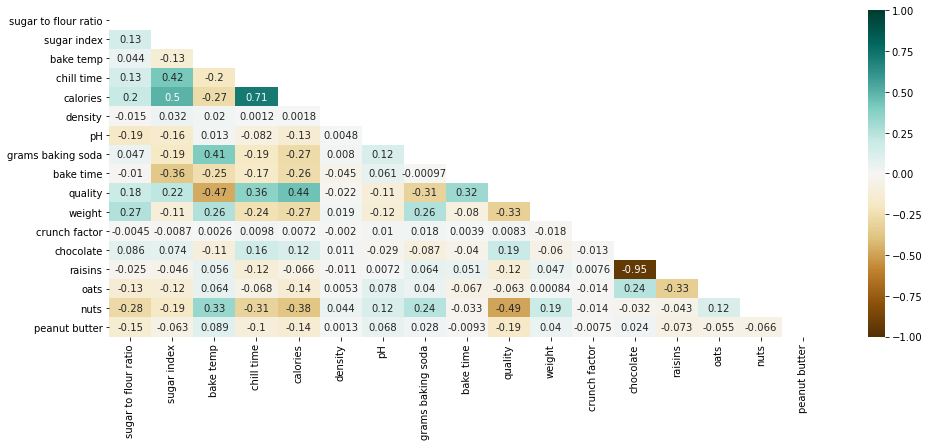

In [54]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(cookies.corr(), dtype=np.bool))
heatmap = sns.heatmap(cookies.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

### pre processing- drop NANs and deal with non numerical data


In [ ]:
cookies.dtypes

In [ ]:
cookies=pd.get_dummies(cookies, columns=['butter type'])


In [ ]:
cookies.info()

In [ ]:
cookies = cookies.dropna()

In [ ]:
cookies.reset_index(drop=True, inplace=True)

### Split data into dependent and independent variables 

In [ ]:
X= cookies.drop(columns="quality")
y=cookies.quality

### Preprocessing - scaling 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

### Train test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.1, random_state=40)


### get model, fit, make predictions  AND evaluate

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [ ]:
predictions  = lm.predict(X_test)

In [ ]:
predictions

In [ ]:
r2_score(y_test, predictions)

In [ ]:
mse = mean_squared_error(y_test, predictions)
print(mse)

In [ ]:
import math 
rmse = math.sqrt(mse)
print(rmse)

### Make predictions on the cookies_validate dataset (without labels)

In [ ]:
cookies_val = pd.read_csv('cookies_validate.csv')

In [ ]:
cookies_val.info()

In [ ]:
cookies_val.drop(columns=["aesthetic appeal", "diameter"], inplace=True)

In [ ]:
cookies_val['chocolate'] = 0
cookies_val['raisins'] = 0
cookies_val['oats'] = 0
cookies_val['nuts'] = 0
cookies_val['peanut butter'] = 0

In [ ]:
mixins = ['chocolate', 'raisins', 'oats', 'nuts', 'peanut butter']
for mix in mixins:
    for i in range(len(cookies_val)):
        if mix in [x.strip() for x in cookies_val.loc[i, 'mixins'].split(',')]:
            cookies_val.loc[i, mix] = 1
            
cookies_val.drop(columns=["mixins"], inplace=True)

In [ ]:
cookies_val.drop(columns= 'id', inplace=True)

In [ ]:
cookies_val=pd.get_dummies(cookies_val, columns=['butter type'])

In [ ]:
cookies_val.info()

In [ ]:
X_val = cookies_val.drop(columns="quality")

In [ ]:
X_val_scaled = scaler.fit_transform(X_val)

In [ ]:
predictions_val=lm.predict(X_val_scaled)

In [ ]:
predictions_val

### assess predictions against the test data (with labels)

In [ ]:
cookies_test = pd.read_csv('cookies_test.csv')

In [ ]:
y_real = cookies_test["quality"]

In [ ]:
y_real.describe()

In [ ]:
mean_squared_error(y_real, predictions_val, squared = False)

### Can we get more accuracy with an ensemble method?

#### Task 4 : Add a random forest regressor model to try to get a more accurate score. 

You can follow https://www.geeksforgeeks.org/random-forest-regression-in-python/
or the sklearn_documentation https://scikit-learn.org/stable/search.html?q=random+forest
to import the regressor and fit it to your data, before running the cells below which will calculate your new RMSE accuracy score

In [ ]:
#Task 4 your code: 


In [ ]:
#Task 4 your code: 

In [ ]:
#Task 4 your code: 

In [ ]:
#Task 4 your code: 

### Evaluate random forest accuracy 

RMSE accuracy Score - depending on what you named your model and predictions this code may need to be adapted

ie if your model is called 'new model' and you have created a prediction from this model 'predictions_new' then edit the code block below as: 
    
    mean_squared_error(y_real, predictions_new, squared = False)
    

In [ ]:
#EDIT as appropriate to get your RMSE 

mean_squared_error(y_real, predictions_val, squared = False)